### High end makeup brands vs low end makeup brands: Price comparison of different makeup brands through visualization
  This set of codes here gather the data from API dataset on makeup products, allows user to choose the brand they are interested in visualizing and input the name. Once the name is given to the function, all kinds of makeup products launched by that particular brand in the market and their prices are shown and it will also allow users to visualize the price range of their products. By inputting multiple brands, we get to visualize price range of products within different brands and it allows us to have an idea of which brands are high end brands and which ones are the low-end brands.

Enter a brand unique name:  maybelline


Retrieving http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline
Retrieved 73875 characters
Product name: Maybelline Face Studio Master Hi-Light Light Booster Bronzer
Price: 14.99
Product name: Maybelline Fit Me Bronzer
Price: 10.29
Product name: Maybelline Facestudio Master Contour Kit
Price: 15.99
Product name: Maybelline Face Studio Master Hi-Light Light Booster Blush
Price: 14.99
Product name: Maybelline Face Studio Master Hi-Light Light Booster Blush 
Price: 14.99
Product name: Maybelline Fit Me Blush
Price: 10.29
Product name: Maybelline Dream Bouncy Blush
Price: 11.99
Product name: Maybelline Color Sensational Lipliner
Price: 8.29
Product name: Maybelline Dream Smooth Mousse Foundation
Price: 14.79
Product name: Maybelline Fit Me Shine-Free Foundation Stick
Price: 10.99
Product name: Maybelline Dream Matte Mousse Foundation
Price: 14.79
Product name: Maybelline Mineral Power Natural Perfecting Powder Foundation
Price: 14.99
Product name: Maybelline Dream Velvet F

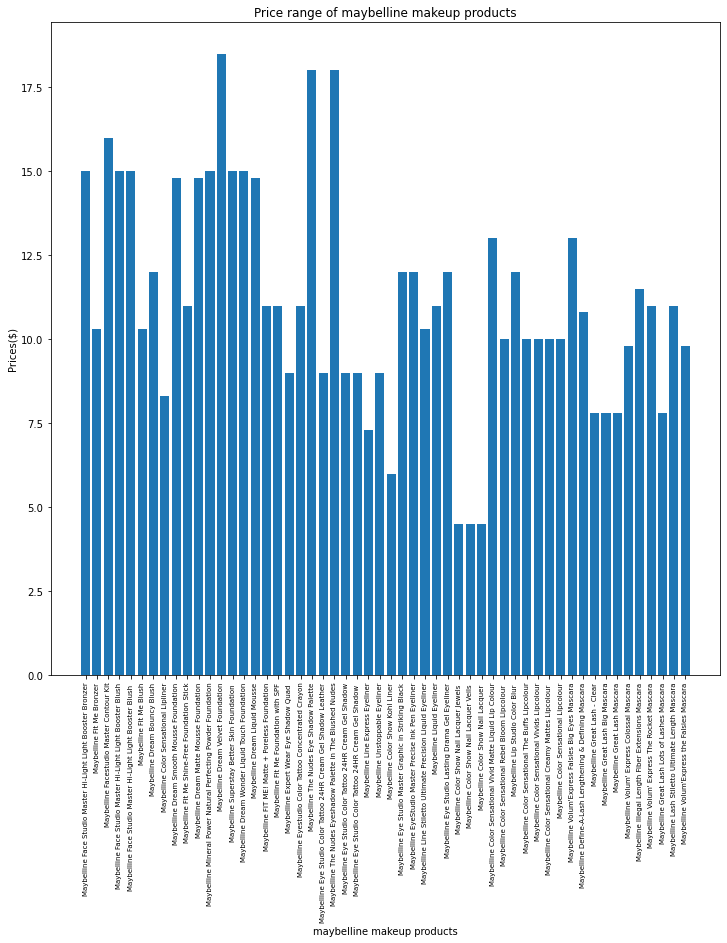

In [ ]:
import urllib.request, urllib.parse, urllib.error
import json
import matplotlib.pyplot as plt

serviceurl = 'http://makeup-api.herokuapp.com/api/v1/products.json'


while True:
    brand = input('Enter a brand unique name: ') ###Asking the user to input the brand of their choice
    if len(brand) < 1: break 
   
    url = serviceurl + "?" + urllib.parse.urlencode(
        {'brand':brand})
       
    print('Retrieving', url)
    uh = urllib.request.urlopen(url)
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

#Reading the data form API
    try:
        js = json.loads(data)
        ##print("done")  
    except:
        js = None

#Creating blank dictionary
   
    dict = {} 

    for productname in js:
        print("Product name:", productname['name'])
        print("Price:", productname['price']) 
    
    
        key_ref = productname['name']
        value_ref = productname['price']


        keys = dict.keys()
        values = dict.values()
    
        try:  
            dict[key_ref]=float(value_ref)
        except:
            print(f"No data")
            continue

   
##data for the bar diagram
    try:
        Product_Names = dict[key_ref]
        Prices = dict[value_ref]
    
    except:
  #Pulling data to put into barchart and editing bar chart size  
        plt.figure(figsize=(12,12)) ##defining size of bar plot
        plt.bar(keys, values)
        plt.xticks(fontsize=7, rotation=90) ## decreasing font size of x-axis and rotating the axis by 90 as the names are too long and can overlap
        plt.title(f'Price range of {brand} makeup products')
        plt.xlabel(f'{brand} makeup products')
        plt.ylabel('Prices($)')
    
 
 
 #Bar chart
    plt.show()

    
